In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv -O car_price.csv

--2023-10-07 09:53:17--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘car_price.csv’

car_price.csv       100%[===================>]   1.41M  --.-KB/s    in 0.05s   

2023-10-07 09:53:17 (29.8 MB/s) - ‘car_price.csv’ saved [1475504/1475504]



In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

cars = pd.read_csv("car_price.csv")
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


*Data Preparation*

In [4]:
cols = [
    'Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
    'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP'
]

cars = cars[cols]
cars.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [5]:
cars_dtypes = cars.dtypes

for col in cols:

    if cars_dtypes.loc[col] == object:
        cars[col] = cars[col].apply(lambda x: x.lower().replace(" ", "_"))

    cars.rename({col: col.lower().replace(" ", "_")}, axis=1, inplace=True)

cars.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [6]:
cars.fillna(0, inplace=True)

In [7]:
msrp_mean = cars['msrp'].mean()

cars['above_average'] = cars['msrp'].apply(lambda x: 1 if x > msrp_mean else 0)
cars.drop('msrp', axis=1, inplace=True)

cars.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,0


In [8]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(
    cars,
    test_size=.2, random_state=1
)

df_train, df_valid = train_test_split(
    df_train_full,
    test_size=.25, random_state=1
)

**Question #1**

In [9]:
from sklearn.metrics import roc_auc_score

num_features = [
    'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'year'
]

scores = {}
for num_feature in num_features:
    score = roc_auc_score(df_train['above_average'], df_train[num_feature])
    if score < 0.5:
        scores[num_feature] = 1 - score
    else:
        scores[num_feature] = score

df_scores = pd.DataFrame.from_dict(
    scores, orient='index', columns=['Importance']
)
df_scores.sort_values(by='Importance', ascending=False)

,Importance
engine_hp,0.917103
engine_cylinders,0.766116
year,0.687551
city_mpg,0.673424
highway_mpg,0.633059


Answer: `engine_hp`

**Question #2**

In [10]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(
    df_train.drop('above_average', axis=1).to_dict(orient='records')
)
X_valid = dv.transform(
    df_valid.drop('above_average', axis=1).to_dict(orient='records')
)
X_test = dv.transform(
    df_test.drop('above_average', axis=1).to_dict(orient='records')
)

y_train = df_train['above_average'].values
y_valid = df_valid['above_average'].values
y_test = df_test['above_average'].values

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
lr.fit(X_train, y_train)

round(roc_auc_score(y_valid, lr.predict_proba(X_valid)[:, 1]), 3)

0.977

Answer: `0.979`

**Question #3**

In [12]:
import numpy as np

def precision(y_true, y_pred_proba, t):
    y_pred = (y_pred_proba > t).astype(int)

    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    true_negatives = np.sum((y_true == 0) & (y_pred == 0))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))

    if (true_positives + false_positives) == 0:
        return 1

    return true_positives / (true_positives + false_positives)

def recall(y_true, y_pred_proba, t):
    y_pred = (y_pred_proba > t).astype(int)

    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    true_negatives = np.sum((y_true == 0) & (y_pred == 0))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))

    return true_positives / (true_positives + false_negatives)

precisions = []
recalls = []
thresholds = np.linspace(start=0, stop=1, num=100).round(2)

y_pred_proba = lr.predict_proba(X_valid)[:, 1]
for threshold in thresholds:
    precisions.append(precision(y_valid, y_pred_proba, threshold))
    recalls.append(recall(y_valid, y_pred_proba, threshold))

Intersection threshold(s): [0.47 0.48 0.49]


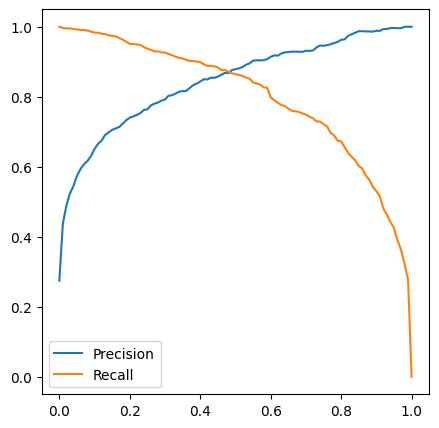

In [13]:
import matplotlib.pyplot as plt

precisions = np.array(precisions)
recalls = np.array(recalls)
intersection_mask = np.abs(precisions - recalls) < 1e-2
print(f'Intersection threshold(s): {thresholds[intersection_mask]}')

plt.figure(figsize=(5, 5))

plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')

plt.legend()
plt.show()

Answer: `0.48`

**Question #4**

In [14]:
def f1_score(y_true, y_pred_proba, t):
    precision_score = precision(y_true, y_pred_proba, t)
    recall_score = recall(y_true, y_pred_proba, t)

    return 2 * precision_score * recall_score / (recall_score + precision_score)

f1_scores = []

y_pred_proba = lr.predict_proba(X_valid)[:, 1]
for threshold in thresholds:
    f1_scores.append(f1_score(y_valid, y_pred_proba, threshold))

thresholds[np.argmax(f1_scores)]

0.54

Answer: `0.52`

**Question #5**

In [15]:
from sklearn.model_selection import KFold

auc_scores = []
lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
dv = DictVectorizer(sparse=False)
kf = KFold(n_splits=5, shuffle=True, random_state=1)
for i, (train_index, test_index) in enumerate(kf.split(df_train_full)):
    train_fold = df_train_full.iloc[train_index].drop('above_average', axis=1)
    valid_fold = df_train_full.iloc[test_index].drop('above_average', axis=1)

    X_train_fold = dv.fit_transform(train_fold.to_dict(orient='records'))
    X_valid_fold = dv.transform(valid_fold.to_dict(orient='records'))
    y_train_fold = df_train_full.iloc[train_index]['above_average'].values
    y_valid_fold = df_train_full.iloc[test_index]['above_average'].values

    lr.fit(X_train_fold, y_train_fold)

    auc_score = roc_auc_score(
        y_valid_fold,
        lr.predict(X_valid_fold)
    )
    auc_scores.append(auc_score)

np.std(auc_scores).round(3)

0.009

Answer: `0.003`

**Question #6**

In [16]:
Cs = [0.01, 0.1, 0.5, 10]
auc_scores_C = {}

for C in Cs:
    kf = KFold(n_splits=5, shuffle=True, random_state=1)

    lr = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    auc_scores = []
    for i, (train_index, test_index) in enumerate(kf.split(df_train_full)):
        train_fold = df_train_full.iloc[train_index].drop('above_average', axis=1)
        valid_fold = df_train_full.iloc[test_index].drop('above_average', axis=1)

        X_train_fold = dv.fit_transform(train_fold.to_dict(orient='records'))
        X_valid_fold = dv.transform(valid_fold.to_dict(orient='records'))
        y_train_fold = df_train_full.iloc[train_index]['above_average'].values
        y_valid_fold = df_train_full.iloc[test_index]['above_average'].values

        lr.fit(X_train_fold, y_train_fold)

        auc_score = roc_auc_score(
            y_valid_fold,
            lr.predict(X_valid_fold)
        )
        auc_scores.append(auc_score)

    auc_scores_C[C] = (
        np.mean(auc_scores).round(3), np.std(auc_scores).round(3)
    )

In [17]:
folds_res = pd.DataFrame.from_dict(
    auc_scores_C, orient='index', columns=['mean', 'std']
)
folds_res.sort_values(by=['mean', 'std'], ascending=False)

,mean,std
10.00,0.919,0.012
0.50,0.912,0.009
0.10,0.888,0.007
0.01,0.843,0.004


Answer: `10`